# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
import requests
from bs4 import BeautifulSoup
import time

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 380

reviews = []
dates = []
ratings = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve page {i}: {response.status_code}")
        continue  # Skip to the next iteration

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text(strip=True))

    # Extract dates
    for sub_head in parsed_content.find_all("h3", {"class": "text_sub_header userStatusWrapper"}):
        dates.append(sub_head.get_text(strip=True))

    print(f"   ---> {len(reviews)} total reviews so far")

    # Extract ratings
    ratings_table = parsed_content.find("table", class_="review-ratings")
    if ratings_table:
        page_ratings = {}
        for row in ratings_table.find_all("tr"):
            label_cell = row.find("td", class_="review-rating-header")
            value_cell = row.find("td", class_="review-value")

            if label_cell and value_cell:
                label = label_cell.text.strip()
                value = value_cell.text.strip()
                page_ratings[label] = value
        
        ratings.append(page_ratings)

    time.sleep(1)  # Sleep for 1 second between requests

# Print the extracted data
print(f"Total reviews collected: {len(reviews)}")
print(f"Total ratings collected: {len(ratings)}")
print("Ratings information per page:")
for i, page_rating in enumerate(ratings, start=1):
    print(f"Page {i}: {page_rating}")


Scraping page 1
   ---> 380 total reviews so far
Scraping page 2
   ---> 760 total reviews so far
Scraping page 3
   ---> 1140 total reviews so far
Scraping page 4
   ---> 1520 total reviews so far
Scraping page 5
   ---> 1900 total reviews so far
Scraping page 6
   ---> 2280 total reviews so far
Scraping page 7
   ---> 2660 total reviews so far
Scraping page 8
   ---> 3040 total reviews so far
Scraping page 9
   ---> 3420 total reviews so far
Scraping page 10
   ---> 3800 total reviews so far
Scraping page 11
   ---> 3877 total reviews so far
Scraping page 12
   ---> 3877 total reviews so far
Scraping page 13
   ---> 3877 total reviews so far
Scraping page 14
   ---> 3877 total reviews so far
Scraping page 15
   ---> 3877 total reviews so far
Scraping page 16
   ---> 3877 total reviews so far
Scraping page 17
   ---> 3877 total reviews so far
Scraping page 18
   ---> 3877 total reviews so far
Scraping page 19
   ---> 3877 total reviews so far
Scraping page 20
   ---> 3877 total review

In [164]:
df = pd.DataFrame()
df["reviews"] = reviews
df['date'] = date
df['rating'] = rating
df.head()

,reviews,date,rating
0,✅Trip Verified| On arriving at Mexico Airpor...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN
1,✅Trip Verified| I have flown British Airways...,\n\nM Stansfield (United States) 24th October ...,NaN
2,Not Verified| We bought tickets for a Geneva-L...,\n\nClaude Cahn (Switzerland) 22nd October 2024,NaN
3,✅Trip Verified| Appalling service with faili...,\n\nPeter Mountford (South Africa) 14th Octobe...,NaN
4,✅Trip Verified| British Airways charge you for...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3877 non-null   object
 1   date     3877 non-null   object
 2   rating   0 non-null      object
dtypes: object(3)
memory usage: 91.0+ KB


In [166]:
def location_date(text):
    try:
        location = text.split("(")[1].split(")")[0].strip()  # Extracts the location
        date = text.split(") ")[1].strip()  # Extracts the date
        return pd.Series([location, date])  # Returns a Series with the location and date
    except IndexError:
        # Return None or appropriate default values if format is incorrect
        return pd.Series([None, None])
    
df[['location', 'review_date']] = df['date'].apply(location_date)
    

In [167]:
df.isna().sum()

reviews           0
date              0
rating         3877
location          2
review_date       2
dtype: int64

In [168]:
df = df.dropna(subset=['review_date'])
df

,reviews,date,rating,location,review_date
0,✅Trip Verified| On arriving at Mexico Airpor...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN,United Kingdom,25th October 2024
1,✅Trip Verified| I have flown British Airways...,\n\nM Stansfield (United States) 24th October ...,NaN,United States,24th October 2024
2,Not Verified| We bought tickets for a Geneva-L...,\n\nClaude Cahn (Switzerland) 22nd October 2024,NaN,Switzerland,22nd October 2024
3,✅Trip Verified| Appalling service with faili...,\n\nPeter Mountford (South Africa) 14th Octobe...,NaN,South Africa,14th October 2024
4,✅Trip Verified| British Airways charge you for...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN,United Kingdom,12th October 2024
...,...,...,...,...,...
3872,Flew LHR - VIE return operated by bmi but BA a...,\n\nW Benson (United Kingdom) 29th August 2012,NaN,United Kingdom,29th August 2012
3873,LHR to HAM. Purser addresses all club passenge...,\n\nNick Berry (United Kingdom) 28th August 2012,NaN,United Kingdom,28th August 2012
3874,My son who had worked for British Airways urge...,\n\nAvril Barclay (United Kingdom) 12th Octobe...,NaN,United Kingdom,12th October 2011
3875,London City-New York JFK via Shannon on A318 b...,\n\nC Volz (United States) 11th October 2011,NaN,United States,11th October 2011


In [169]:
df.isna().sum()

reviews           0
date              0
rating         3875
location          0
review_date       0
dtype: int64

In [170]:
df['review_date'] = df['review_date'].str.replace("th", "", regex=False).str.replace("st", "", regex=False).str.replace("nd"," ", regex=False).str.replace("rd", "", regex=False)

In [171]:
df['review_date'] = df['review_date'].str.replace("Augu", "August")#.str.replace("25October", "25 October")
df['reviews'] = df['reviews'].str.replace("Trip Verified", "")

In [172]:
df['review_date'] = pd.to_datetime(df['review_date'], format='%d %B %Y')

df['year'] = df['review_date'].dt.year
df['year'].dropna(inplace=True)
df['year'] = df['year'].astype('int64')

df.head()

,reviews,date,rating,location,review_date,year
0,✅| On arriving at Mexico Airport we were tol...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN,United Kingdom,2024-10-25,2024
1,✅| I have flown British Airways for many yea...,\n\nM Stansfield (United States) 24th October ...,NaN,United States,2024-10-24,2024
2,Not Verified| We bought tickets for a Geneva-L...,\n\nClaude Cahn (Switzerland) 22nd October 2024,NaN,Switzerland,2024-10-22,2024
3,✅| Appalling service with failing defective ...,\n\nPeter Mountford (South Africa) 14th Octobe...,NaN,South Africa,2024-10-14,2024
4,✅| British Airways charge you for the pleasure...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,NaN,United Kingdom,2024-10-12,2024


In [173]:
df.drop("rating", axis=1, inplace=True)

In [174]:
df.to_csv("british_airways_review.csv")

In [196]:
df = pd.read_csv("british_airways_review.csv")

In [197]:
df

,Unnamed: 0,reviews,date,location,review_date,year
0,0,✅| On arriving at Mexico Airport we were tol...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,United Kingdom,2024-10-25,2024
1,1,✅| I have flown British Airways for many yea...,\n\nM Stansfield (United States) 24th October ...,United States,2024-10-24,2024
2,2,Not Verified| We bought tickets for a Geneva-L...,\n\nClaude Cahn (Switzerland) 22nd October 2024,Switzerland,2024-10-22,2024
3,3,✅| Appalling service with failing defective ...,\n\nPeter Mountford (South Africa) 14th Octobe...,South Africa,2024-10-14,2024
4,4,✅| British Airways charge you for the pleasure...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,United Kingdom,2024-10-12,2024
...,...,...,...,...,...,...
3870,3872,Flew LHR - VIE return operated by bmi but BA a...,\n\nW Benson (United Kingdom) 29th August 2012,United Kingdom,2012-08-29,2012
3871,3873,LHR to HAM. Purser addresses all club passenge...,\n\nNick Berry (United Kingdom) 28th August 2012,United Kingdom,2012-08-28,2012
3872,3874,My son who had worked for British Airways urge...,\n\nAvril Barclay (United Kingdom) 12th Octobe...,United Kingdom,2011-10-12,2011
3873,3875,London City-New York JFK via Shannon on A318 b...,\n\nC Volz (United States) 11th October 2011,United States,2011-10-11,2011


In [198]:
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '', regex=True)
df['reviews']= df['reviews'].str.lower()
df = df[df['reviews'].str.strip().astype(bool)]
df.head()

,Unnamed: 0,reviews,date,location,review_date,year
0,0,on arriving at mexico airport we were told ...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,United Kingdom,2024-10-25,2024
1,1,i have flown british airways for many years...,\n\nM Stansfield (United States) 24th October ...,United States,2024-10-24,2024
2,2,not verified we bought tickets for a genevalon...,\n\nClaude Cahn (Switzerland) 22nd October 2024,Switzerland,2024-10-22,2024
3,3,appalling service with failing defective fl...,\n\nPeter Mountford (South Africa) 14th Octobe...,South Africa,2024-10-14,2024
4,4,british airways charge you for the pleasure o...,\n\n36 reviews\n\n\n\nPaul Mercer (United King...,United Kingdom,2024-10-12,2024


In [199]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [209]:
#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df['sentiment'].mean())

#negative sentiment score: 0 to -1
#neutral sentiment score: 0
#positive sentiment score: 0 to 1

0.1564243870967742


In [203]:
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_normalized = df['sentiment_category'].value_counts(normalize=True) * 100
sentiment_normalized

sentiment_category
Positive    57.161290
Negative    41.316129
Neutral      1.522581
Name: proportion, dtype: float64

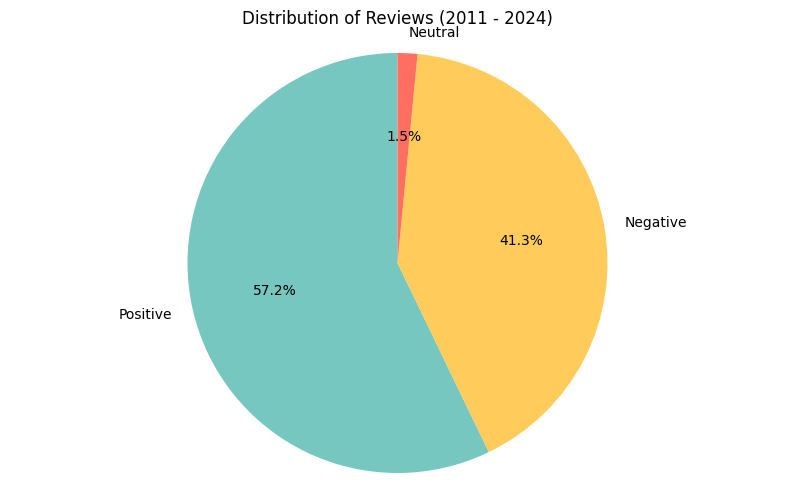

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(sentiment_normalized.values, labels=sentiment_normalized.index, autopct='%1.1f%%', startangle=90, colors=['#76c7c0', '#ffcc5c', '#ff6f61'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Reviews (2011 - 2024)')
plt.show()

In [206]:
sentiment_counts_year = df.groupby(['year', 'sentiment_category']).size().unstack(fill_value=0)
sentiment_counts_normalized = sentiment_counts_year.div(sentiment_counts_year.sum(axis=1), axis=0)
sentiment_counts_normalized

C:\Users\PC\AppData\Local\Temp\ipykernel_548\892230995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts_year = df.groupby(['year', 'sentiment_category']).size().unstack(fill_value=0)


sentiment_category,Negative,Neutral,Positive
year,,,
2011,0.000000,0.000000,1.000000
2012,0.416667,0.000000,0.583333
2014,0.295503,0.010707,0.693790
2015,0.333786,0.016282,0.649932
2016,0.366667,0.014035,0.619298
2017,0.459790,0.017483,0.522727
2018,0.438272,0.012346,0.549383
2019,0.435393,0.008427,0.556180
2020,0.471154,0.038462,0.490385


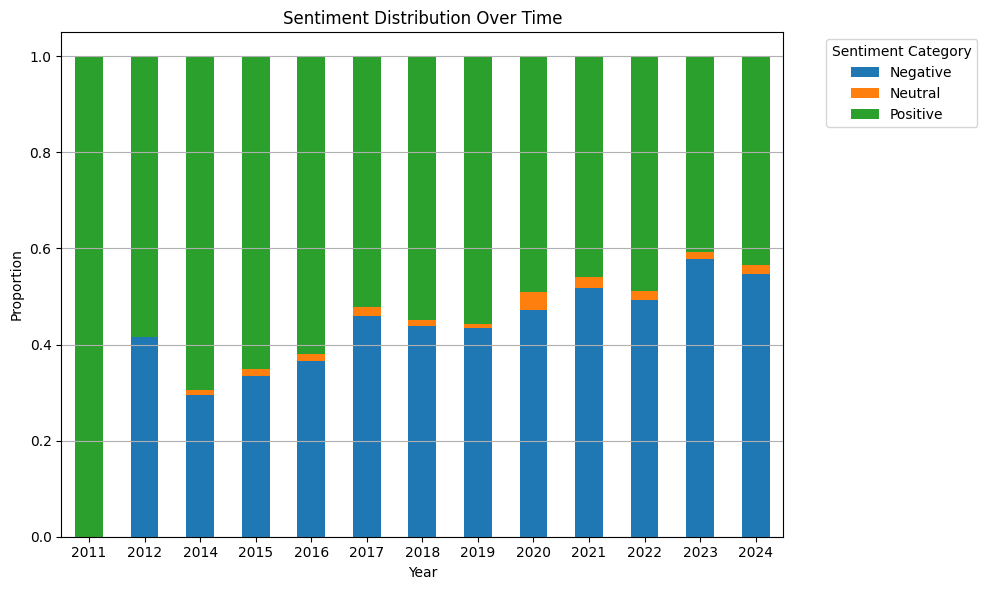

In [214]:
# Plot each sentiment category
#for sentiment in sentiment_counts_year.columns:
 #  sentiment_counts_normalized = sentiment_counts_year.div(sentiment_counts_year.sum(axis=1), axis=0)

# Create a stacked bar chart
ax = sentiment_counts_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend
plt.grid(axis='y')  # Add grid only on y-axis
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()
#

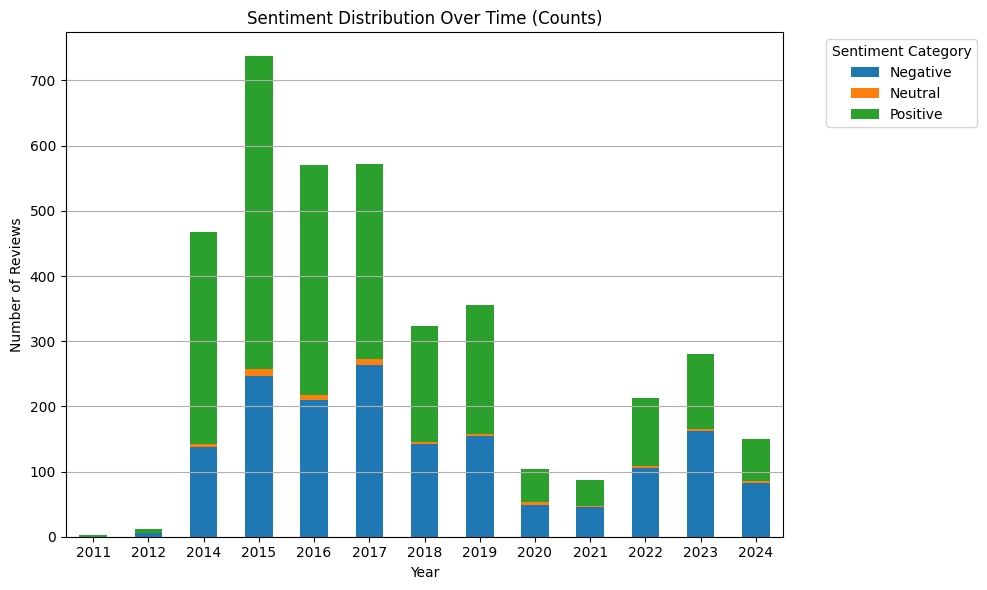

In [215]:
ax = sentiment_counts_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Sentiment Distribution Over Time (Counts)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend
plt.grid(axis='y')  # Add grid only on y-axis
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()

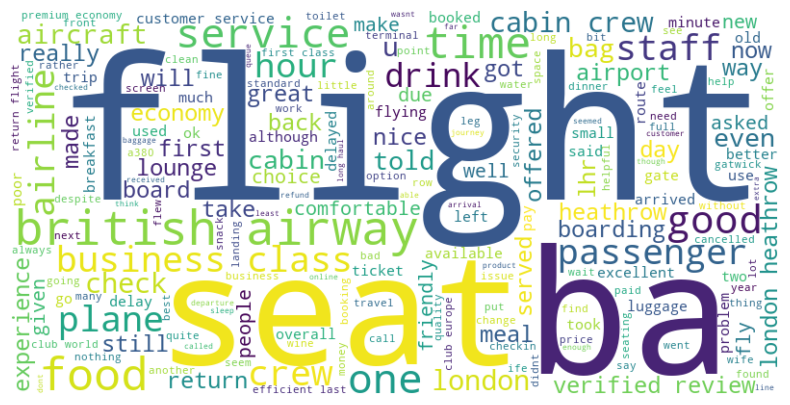

In [208]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['reviews']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [81]:
from collections import Counter
import re
from nltk.corpus import stopwords

In [83]:
#count word frequencies
all_reviews = ' '.join(df['reviews'])  # Create a single string with all reviews
word_list = all_reviews.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_list if word not in stop_words]

word_counts = Counter(filtered_words)

# Convert word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

In [84]:
word_counts_df

,word,count
0,arriving,100
1,mexico,32
2,airport,732
3,told,857
4,flight,7039
...,...,...
15921,sinlhr,1
15922,b747436,1
15923,sellby,1
15924,inconveniently,1


C:\Users\PC\AppData\Local\Temp\ipykernel_548\2564106241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='viridis')


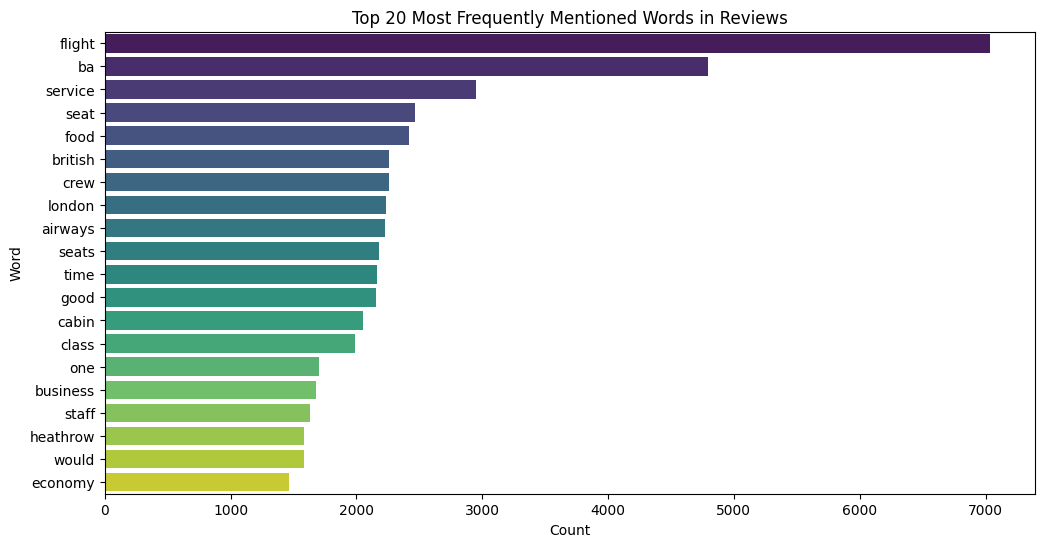

In [85]:
# Step 3: Create a bar chart for the most frequently mentioned words
top_n = 20  # You can change this value to show more or fewer words
top_words_df = word_counts_df.sort_values(by='count', ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=top_words_df, palette='viridis')
plt.title('Top 20 Most Frequently Mentioned Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

#positive words good found in the top 20 most frequent words
#Customer frequently commented on service, crew, food, seat, time, cabin, staff